## RF-DETR - Algae-Vision

Fine Tunes RF-DETR from roboflow on the algae dataset
Note: data paths will require modification, especially if being run locally

In [1]:
!pip install -q rfdetr==1.2.1 supervision==0.26.1 roboflow

In [ ]:
import os
from google.colab import drive
if not os.path.exists('/content/drive'):
    drive.mount("/content/drive")
DATA_ROOT = "/content/drive/MyDrive/college/AI for Conservation/Algae_v6"
required_folders = ["train", "valid", "test"]
for folder in required_folders:
    path = os.path.join(DATA_ROOT, folder, "_annotations.coco.json")
    if os.path.exists(path):
        print(f"Found annotations in {folder}")
    else:
        print(f"Could not find _annotations.coco.json in {folder}")

print(f"Dataset Path: {DATA_ROOT}")

✅ Found annotations in train
✅ Found annotations in valid
✅ Found annotations in test
Dataset Path: /content/drive/MyDrive/college/AI for Conservation/Algae_v6


In [ ]:
from rfdetr import RFDETRMedium
import torch

model = RFDETRMedium()
OUTPUT_DIR = "/content/drive/MyDrive/college/AI for Conservation/rfdetr_weights"

model.train(
    dataset_dir=DATA_ROOT,
    epochs=20,
    batch_size=8,# for A100
    grad_accum_steps=2,
    device="cuda" if torch.cuda.is_available() else "cpu",
    output_dir=OUTPUT_DIR
)

rf-detr-medium.pth: 100%|██████████| 386M/386M [00:18<00:00, 22.2MiB/s]


Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


reinitializing your detection head with 19 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir /content/drive/MyDrive/college/AI for Conservation/rfdetr_weights' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=19, grad_accum_steps=2, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=8, weight_decay=0.0001, epochs=20, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-medium.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=4, 

Epoch: [0]  [  0/120]  eta: 0:35:53  lr: 0.000100  class_error: 93.71  loss: 14.0479 (14.0479)  loss_ce: 0.9479 (0.9479)  loss_bbox: 0.7258 (0.7258)  loss_giou: 0.9124 (0.9124)  loss_ce_0: 0.8327 (0.8327)  loss_bbox_0: 1.0363 (1.0363)  loss_giou_0: 1.1446 (1.1446)  loss_ce_1: 0.9087 (0.9087)  loss_bbox_1: 0.8358 (0.8358)  loss_giou_1: 0.9740 (0.9740)  loss_ce_2: 0.9335 (0.9335)  loss_bbox_2: 0.7744 (0.7744)  loss_giou_2: 0.9304 (0.9304)  loss_ce_enc: 0.8140 (0.8140)  loss_bbox_enc: 1.0800 (1.0800)  loss_giou_enc: 1.1975 (1.1975)  loss_ce_unscaled: 0.9479 (0.9479)  class_error_unscaled: 93.7063 (93.7063)  loss_bbox_unscaled: 0.1452 (0.1452)  loss_giou_unscaled: 0.4562 (0.4562)  cardinality_error_unscaled: 3897.1250 (3897.1250)  loss_ce_0_unscaled: 0.8327 (0.8327)  loss_bbox_0_unscaled: 0.2073 (0.2073)  loss_giou_0_unscaled: 0.5723 (0.5723)  cardinality_error_0_unscaled: 3896.2500 (3896.2500)  loss_ce_1_unscaled: 0.9087 (0.9087)  loss_bbox_1_unscaled: 0.1672 (0.1672)  loss_giou_1_unscale

Test:  [ 0/69]  eta: 0:00:46  class_error: 29.41  loss: 11.2005 (11.2005)  loss_ce: 0.9531 (0.9531)  loss_bbox: 0.4096 (0.4096)  loss_giou: 0.7648 (0.7648)  loss_ce_0: 0.9766 (0.9766)  loss_bbox_0: 0.4666 (0.4666)  loss_giou_0: 0.8315 (0.8315)  loss_ce_1: 0.9570 (0.9570)  loss_bbox_1: 0.4916 (0.4916)  loss_giou_1: 0.8187 (0.8187)  loss_ce_2: 0.9531 (0.9531)  loss_bbox_2: 0.4265 (0.4265)  loss_giou_2: 0.7897 (0.7897)  loss_ce_enc: 0.9766 (0.9766)  loss_bbox_enc: 0.5277 (0.5277)  loss_giou_enc: 0.8574 (0.8574)  loss_ce_unscaled: 0.9531 (0.9531)  class_error_unscaled: 29.4118 (29.4118)  loss_bbox_unscaled: 0.0819 (0.0819)  loss_giou_unscaled: 0.3824 (0.3824)  cardinality_error_unscaled: 289.3750 (289.3750)  loss_ce_0_unscaled: 0.9766 (0.9766)  loss_bbox_0_unscaled: 0.0933 (0.0933)  loss_giou_0_unscaled: 0.4158 (0.4158)  cardinality_error_0_unscaled: 289.3750 (289.3750)  loss_ce_1_unscaled: 0.9570 (0.9570)  loss_bbox_1_unscaled: 0.0983 (0.0983)  loss_giou_1_unscaled: 0.4093 (0.4093)  cardi

Loaded 19 classes: ['plants', 'Algae', 'Clam Shell', 'Elodea Canadensis', 'Eriocaulon Septangulare', 'I. Lacustris', 'Leaves', 'M. Spicatum', 'M. Tenellum', 'Najas', 'P. Amplifolius', 'P. Gramineus', 'P. Perfoliatus', 'P. Praelongus', 'P. Robbinsii', 'P. Zosteriformis', 'Snail', 'Unknown Plant', 'Vallisneria Americana']

--- Visualizing Predictions ---
Prediction for: frame585_585966ms_jpg.rf.e2be7b8f952e0ef40f36da1873aa2125.jpg


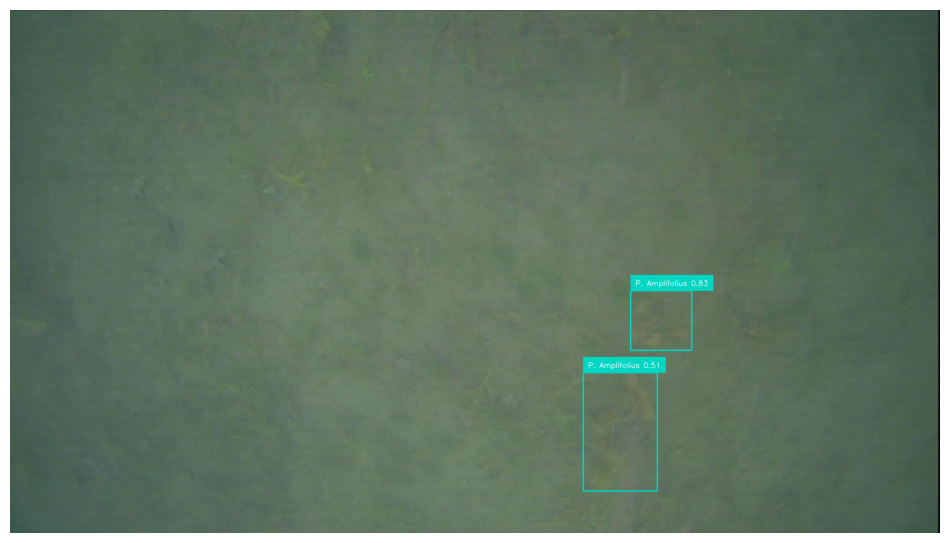

Prediction for: frame115_115966ms_jpg.rf.5d3c02866483e3b1550c43a9f93bec71.jpg


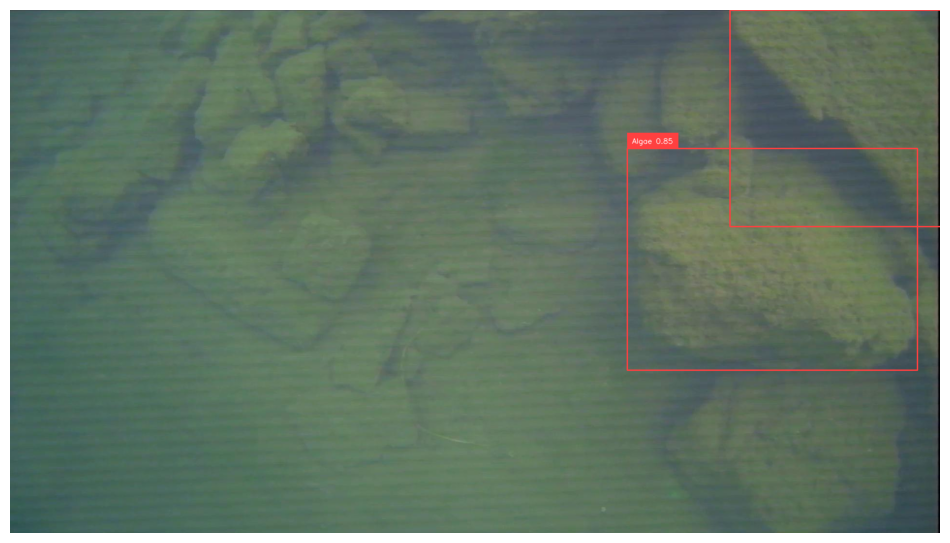

Prediction for: frame73_73966ms_jpg.rf.5ff8fddd3c844121fe2a7f0b694e8db6.jpg


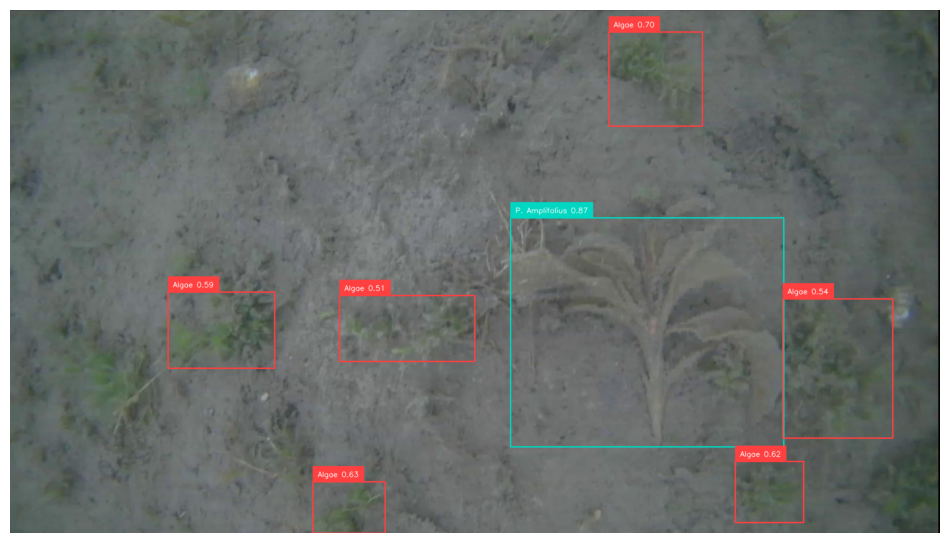


--- Starting Full Evaluation ---
Calculating per-image presence/absence...


100%|██████████| 281/281 [00:14<00:00, 18.79it/s]


=== Per-Species Presence/Absence Report ===
Precision: When model claims species X is present, how often is it right?
Recall:    When species X is actually present, how often does model find it?
------------------------------------------------------------
                         precision    recall  f1-score   support

                 plants       0.00      0.00      0.00         0
                  Algae       0.88      0.62      0.72        34
             Clam Shell       0.93      0.83      0.88        30
      Elodea Canadensis       1.00      0.20      0.33        10
Eriocaulon Septangulare       1.00      0.40      0.57        20
           I. Lacustris       0.00      0.00      0.00         0
                 Leaves       1.00      0.67      0.80         9
            M. Spicatum       0.50      0.14      0.22         7
            M. Tenellum       0.00      0.00      0.00         2
                  Najas       0.00      0.00      0.00         9
         P. Amplifolius    

In [ ]:
import os
import glob
import random
import json
import numpy as np
import supervision as sv
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import classification_report
train_json_path = os.path.join(DATA_ROOT, "train", "_annotations.coco.json")
with open(train_json_path, 'r') as f:
    data = json.load(f)
    sorted_cats = sorted(data['categories'], key=lambda x: x['id'])
    CLASS_NAMES = [cat['name'] for cat in sorted_cats]

print(f"Loaded {len(CLASS_NAMES)} classes: {CLASS_NAMES}")

# Visualize some random samples
def visualize_random_prediction(model, dataset_root, num_images=3):
    print("\n--- Visualizing Predictions ---")
    test_images = glob.glob(os.path.join(dataset_root, "test", "*.jpg"))
    if not test_images:
        print("No images found in test folder")
        return

    for _ in range(num_images):
        image_path = random.choice(test_images)
        image = Image.open(image_path).convert("RGB")

        # .predict() returns a supervision "Detections" object
        detections = model.predict(image, confidence=0.4, overlap=0.5)

        # Create labels using CLASS_NAMES list (instead of index number)
        labels = [
            f"{CLASS_NAMES[class_id]} {confidence:.2f}"
            for class_id, confidence
            in zip(detections.class_id, detections.confidence)
        ]

        # Annotate
        box_annotator = sv.BoxAnnotator()
        label_annotator = sv.LabelAnnotator()

        annotated_image = image.copy()
        annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
        annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

        print(f"Prediction for: {os.path.basename(image_path)}")
        sv.plot_image(annotated_image)

# Evaluation function for per image species presence/absence
def evaluate_test_set(model, dataset_root):
    print("\n--- Starting Full Evaluation ---")

    test_ds = sv.DetectionDataset.from_coco(
        images_directory_path=os.path.join(dataset_root, "test"),
        annotations_path=os.path.join(dataset_root, "test", "_annotations.coco.json")
    )
    print("Calculating per-image presence/absence...")
    y_true = []
    y_pred = []

    # iterate over annotation keys
    image_names = list(test_ds.annotations.keys())

    for img_name in tqdm(image_names):
        # Get Ground Truth Classes for this image
        gt_detections = test_ds.annotations[img_name]
        gt_classes = set(gt_detections.class_id)

        # Load image
        img_path = os.path.join(dataset_root, "test", img_name)
        if not os.path.exists(img_path):
            continue # if missing file

        pil_img = Image.open(img_path).convert("RGB")

        # Run Model
        pred_detections = model.predict(pil_img, confidence=0.4)
        pred_classes = set(pred_detections.class_id)

        # Create Binary Vectors for scikit-learn presence/absence
        gt_vector = [1 if i in gt_classes else 0 for i in range(len(CLASS_NAMES))]
        pred_vector = [1 if i in pred_classes else 0 for i in range(len(CLASS_NAMES))]

        y_true.append(gt_vector)
        y_pred.append(pred_vector)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    print("\n=== Per-Species Presence/Absence Report ===")
    print("Precision: When model claims species X is present, how often is it right?")
    print("Recall:    When species X is actually present, how often does model find it?")
    print("-" * 60)
    print(classification_report(y_true, y_pred, target_names=CLASS_NAMES, zero_division=0))


visualize_random_prediction(model, DATA_ROOT, num_images=3)
evaluate_test_set(model, DATA_ROOT)

--- Per-Class Bounding Box Metrics (IoU=0.5, Conf=0.4) ---

Results per Class:
+-------------------------+-----------------+--------------+----------+--------------------+
|        Class Name       | Precision (Box) | Recall (Box) | F1-Score | Support (GT Boxes) |
+-------------------------+-----------------+--------------+----------+--------------------+
|          plants         |       0.00      |     0.00     |   0.00   |         0          |
|          Algae          |       0.62      |     0.21     |   0.31   |        145         |
|        Clam Shell       |       0.74      |     0.45     |   0.56   |         94         |
|    Elodea Canadensis    |       1.00      |     0.05     |   0.10   |         20         |
| Eriocaulon Septangulare |       0.87      |     0.27     |   0.41   |        292         |
|       I. Lacustris      |       0.00      |     0.00     |   0.00   |         0          |
|          Leaves         |       0.67      |     0.39     |   0.49   |         41  

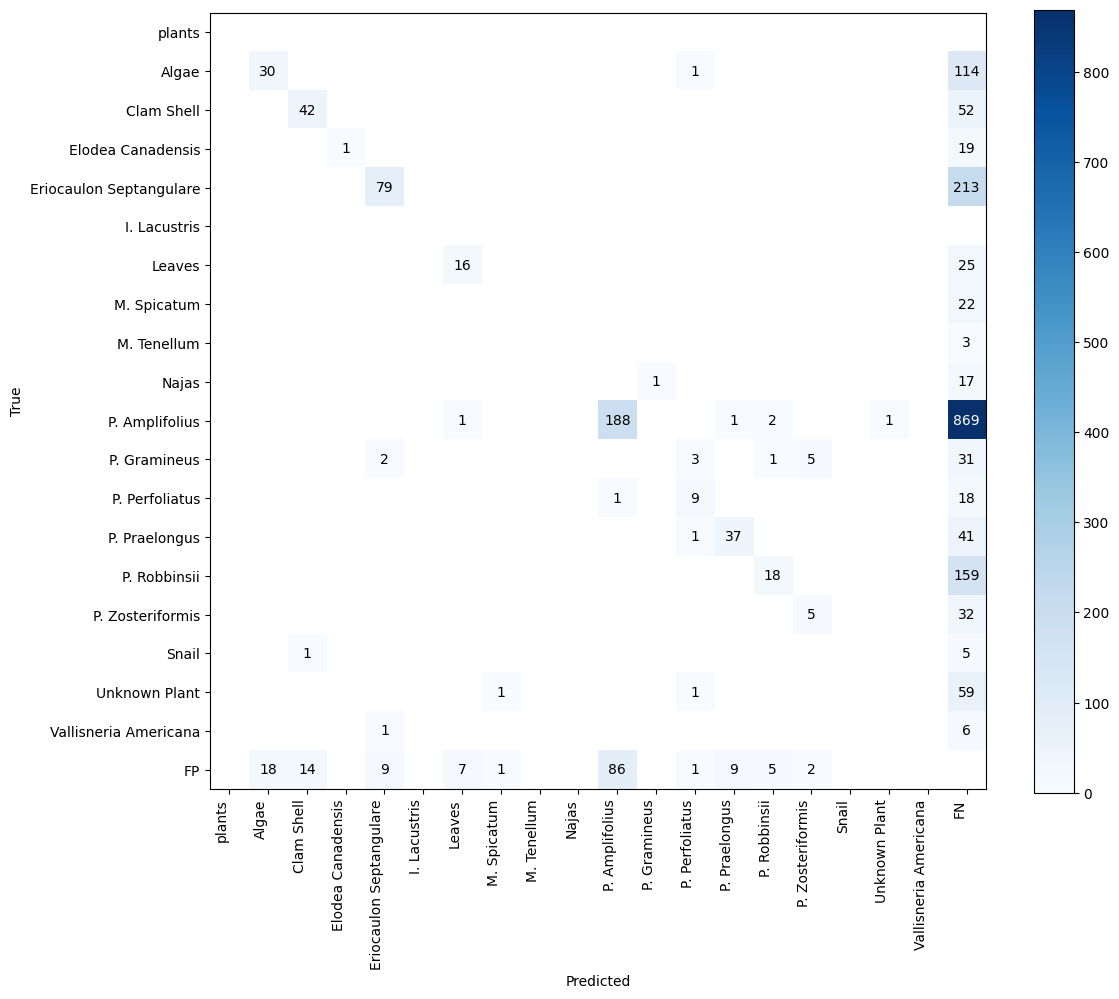

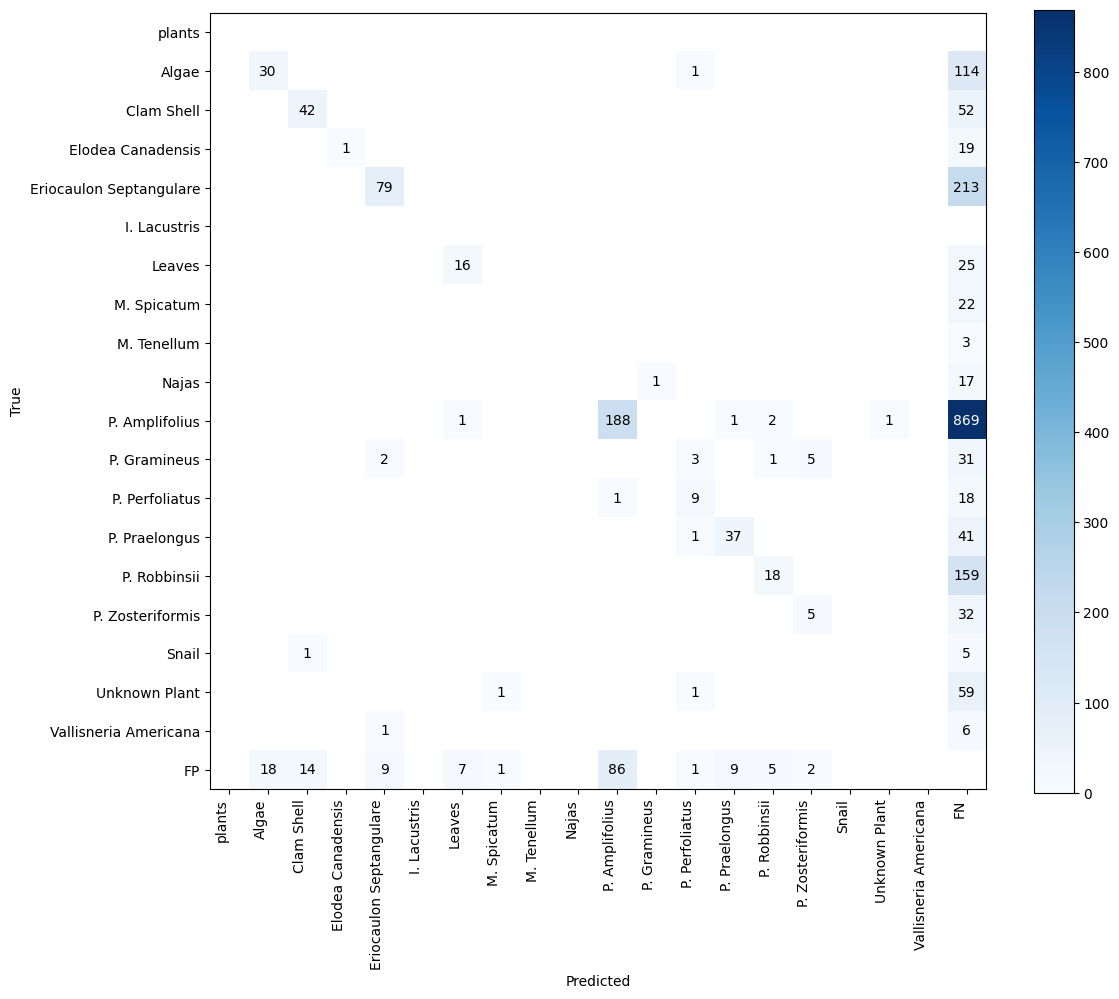

In [ ]:
import os
import numpy as np
import supervision as sv
from PIL import Image
from prettytable import PrettyTable
import matplotlib.pyplot as plt

# evaluating bounding box accuracy per-class
def evaluate_bbox_per_class(model, dataset_root, confidence_threshold=0.4, iou_threshold=0.5):
    print(f"--- Per-Class Bounding Box Metrics (IoU={iou_threshold}, Conf={confidence_threshold}) ---")

    test_ds = sv.DetectionDataset.from_coco(
        images_directory_path=os.path.join(dataset_root, "test"),
        annotations_path=os.path.join(dataset_root, "test", "_annotations.coco.json")
    )
    def callback(image: np.ndarray) -> sv.Detections:
        return model.predict(Image.fromarray(image), confidence=confidence_threshold)

    # Compute Confusion Matrix:
    # matching predictions to ground truth boxes based on IoU
    cm = sv.ConfusionMatrix.benchmark(
        dataset=test_ds,
        callback=callback,
        conf_threshold=confidence_threshold,
        iou_threshold=iou_threshold
    )

    # Extract Metrics per Class
    matrix = cm.matrix

    table = PrettyTable()
    table.field_names = ["Class Name", "Precision (Box)", "Recall (Box)", "F1-Score", "Support (GT Boxes)"]

    print("\nResults per Class:")

    for i, class_name in enumerate(CLASS_NAMES):
        # True positives on the diagonal
        tp = matrix[i, i]

        # False Positives columnb sum
        fp = matrix[:, i].sum() - tp

        # False Negatives row sum
        fn = matrix[i, :].sum() - tp

        # Support (number of ground truth boxes present fo rthis class)
        support = matrix[i, :].sum()

        #metrics
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        table.add_row([
            class_name,
            f"{precision:.2f}",
            f"{recall:.2f}",
            f"{f1:.2f}",
            int(support)
        ])

    print(table)

    # plot confusinon matrix (per class bounding box)
    cm.plot(classes=CLASS_NAMES, normalize=False)
    plt.show()

evaluate_bbox_per_class(model, DATA_ROOT, confidence_threshold=0.4, iou_threshold=0.5)


--- Visualizing Predictions ---
Prediction for: frame13_13966ms_jpg.rf.a3088f68f0b7ceae20f648ab048ada05.jpg


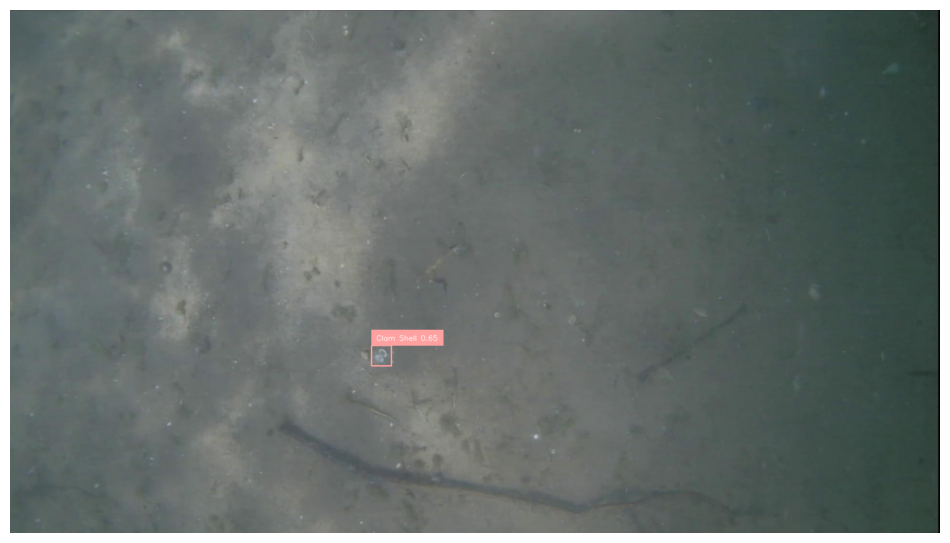

Prediction for: frame360_363600ms_jpg.rf.19a18023fad69a4f3d9de87a3ff9cec5.jpg


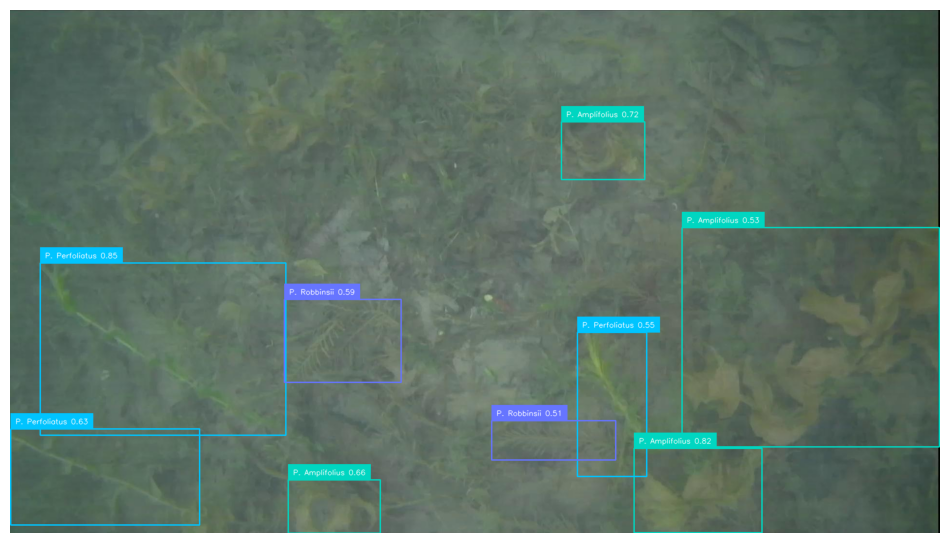

Prediction for: frame905_905966ms_jpg.rf.f7adefbad07f28d4c66a87927fb8cf84.jpg


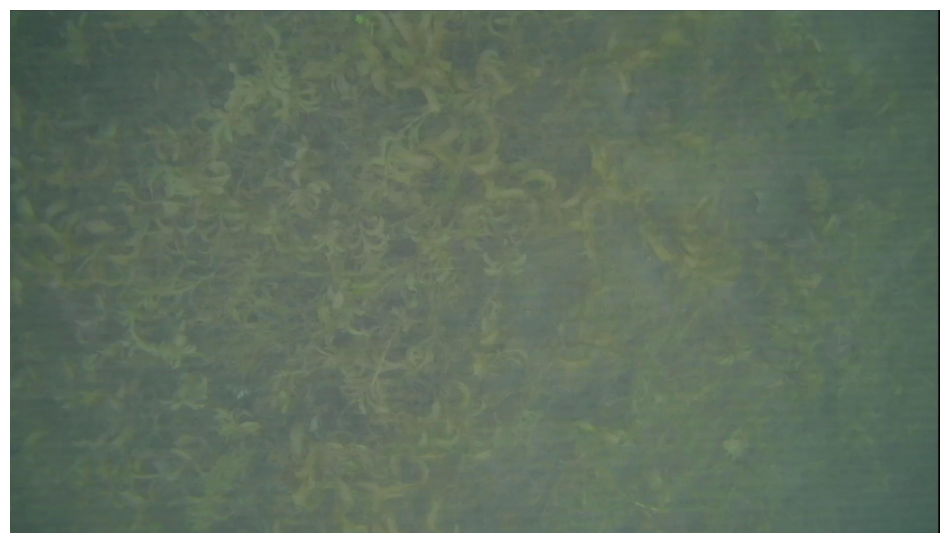

Prediction for: frame50_50966ms_jpg.rf.a030ae63f54342ce79d4535607fbb3ba.jpg


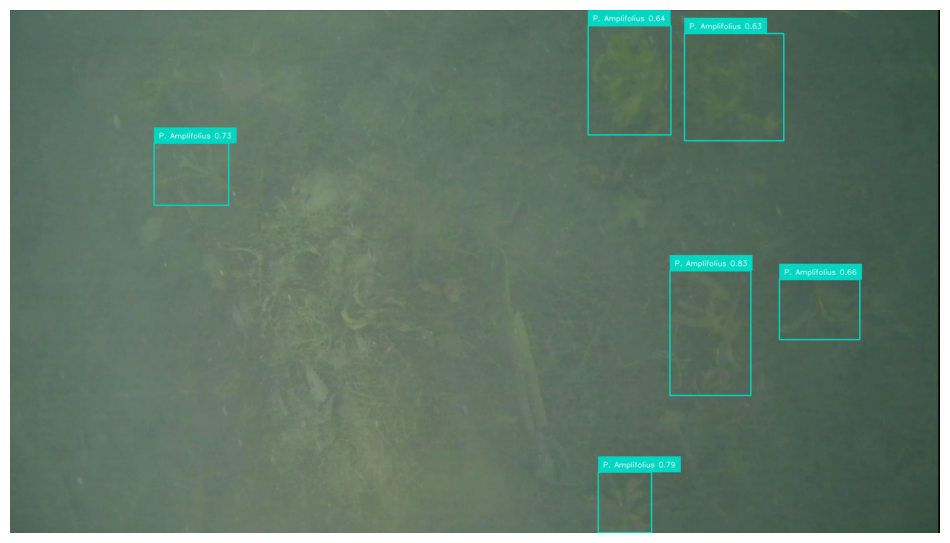

Prediction for: frame265_268600ms_jpg.rf.53510cf0554ec0ac9330807762977e9e.jpg


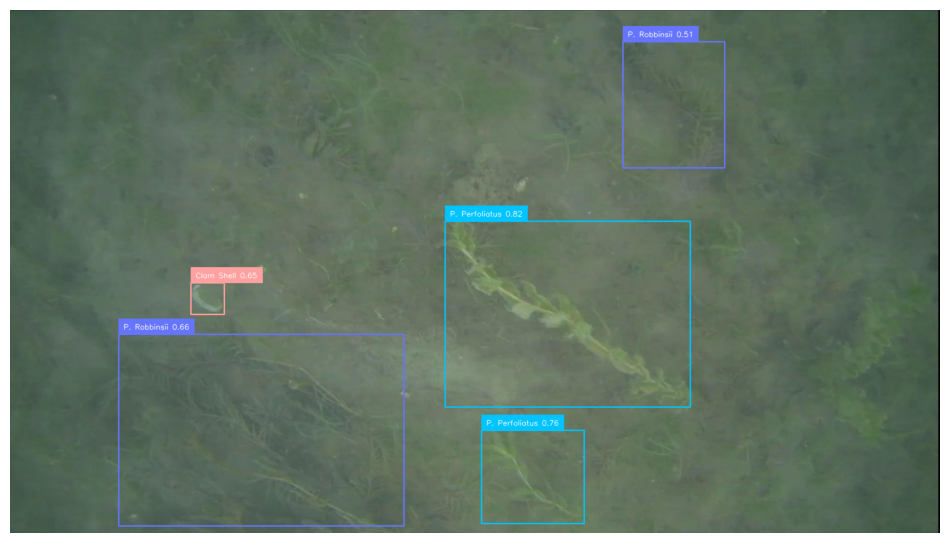

Prediction for: frame184_184966ms_jpg.rf.1c56f708ce256ab6d133416cdb72f27d.jpg


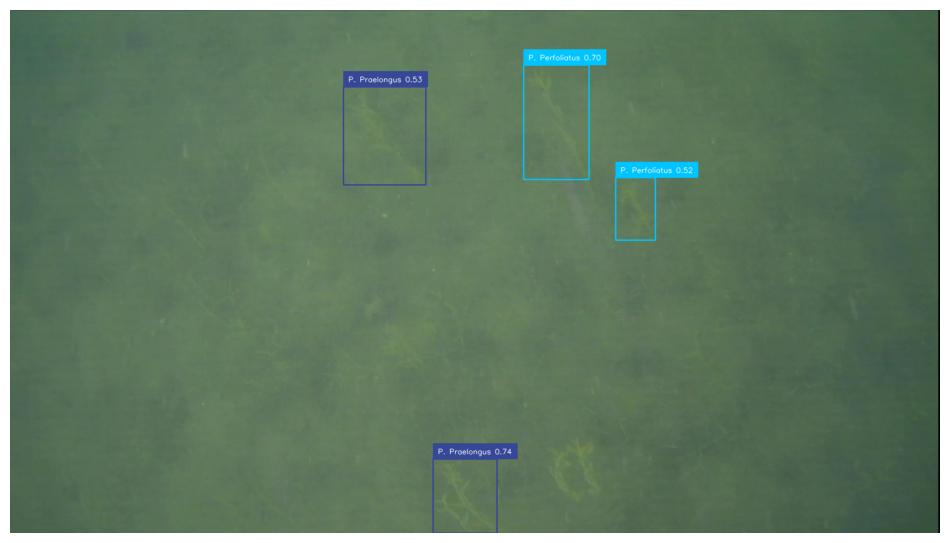

Prediction for: frame379_379966ms_jpg.rf.32a1c4ee19d273c2b2b73e8361e7724b.jpg


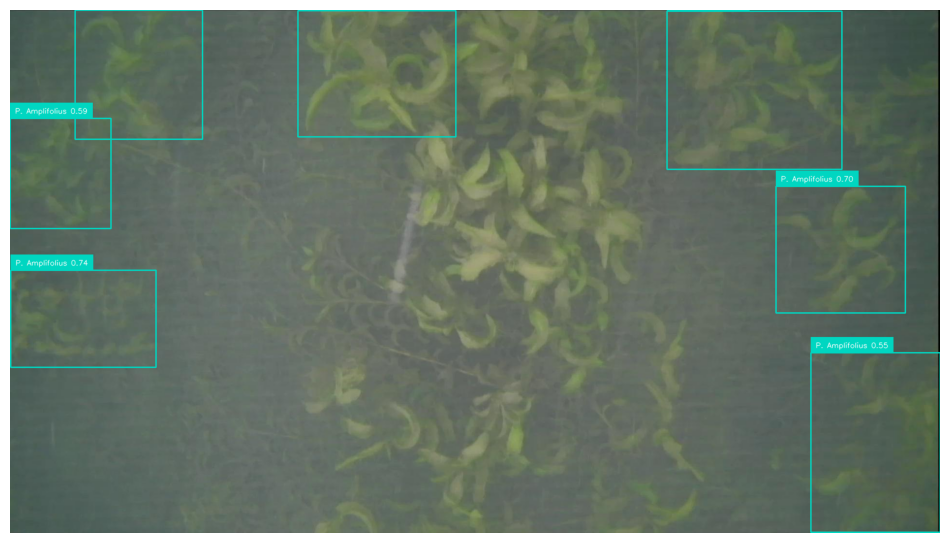

Prediction for: frame138_138966ms_jpg.rf.2b48375fca2a85c83da7fe4aceb7a4f2.jpg


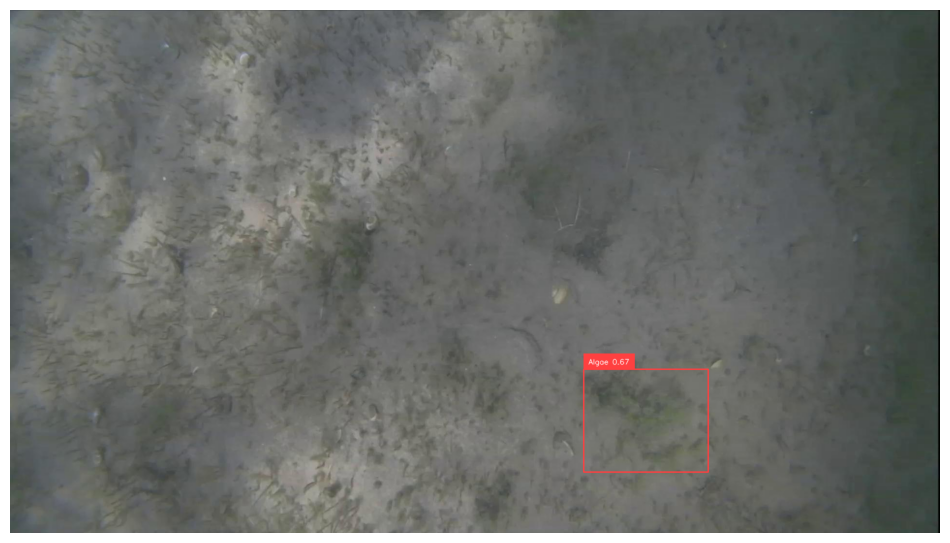

Prediction for: frame105_105966ms_jpg.rf.2edf3a92ef0ee07e5b3f5ba34f51ee14.jpg


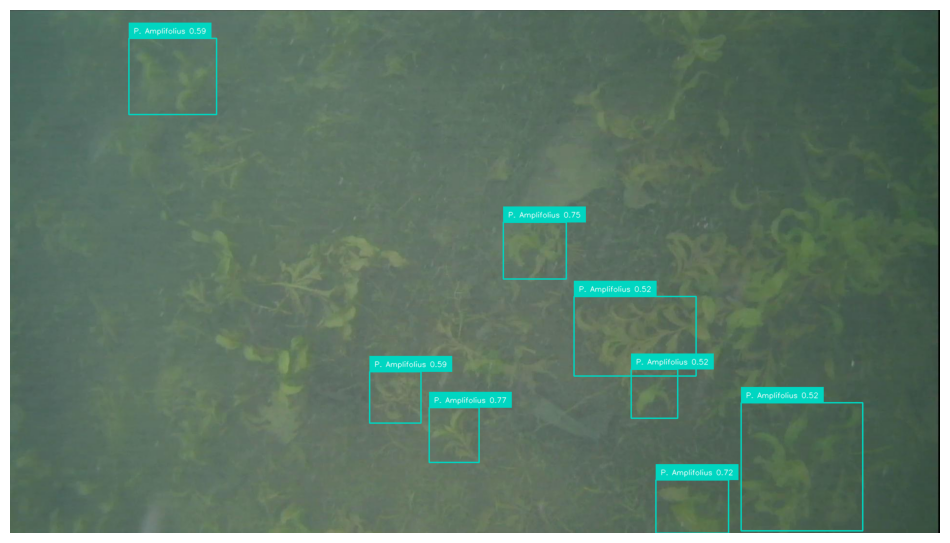

Prediction for: frame137_137966ms_jpg.rf.e0268d2591f9e188cd95d3ef5fd858bc.jpg


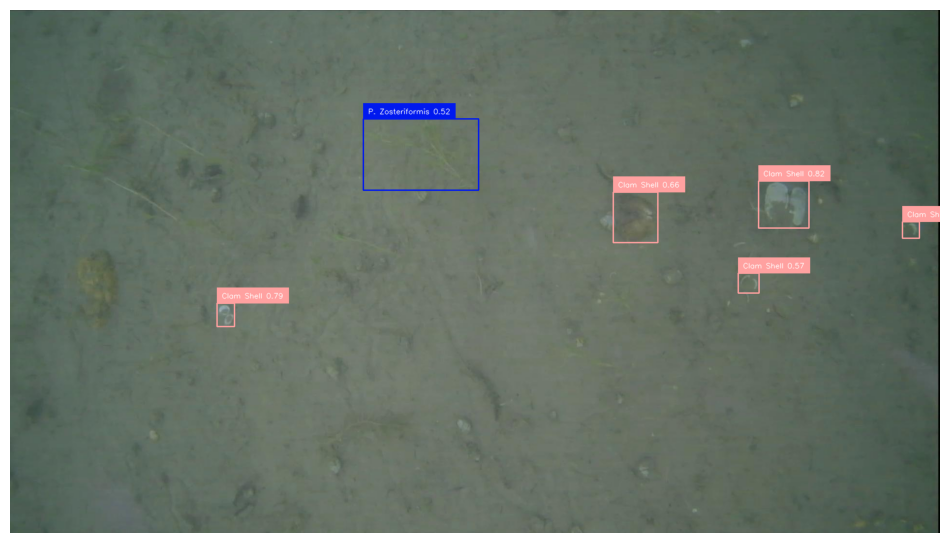

In [ ]:
visualize_random_prediction(model, DATA_ROOT, num_images=10)